<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Putu !

Perkenalkan saya Dipta, disini saya akan mereview tugas Putu ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Putu dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Menganalisis Penjualan Game Pada Suatu Wilayah

Sebagai seorang data analis, salah satu kewajiban yang dilakukan adalah membantu divisi lain untuk bisa melakukan pengembangan produk. Saat ini anda akan bekerja sebagai seorang data analis di sebuah industri vidio game (permainan). Dengan mengamati genre dan platform yang paling populer pada suatu wilayah, diharapkan dapat membantu tim developer untuk bisa mengembangkan game dengan genre dan platform yang paling diminati di satu wilayah tersebut. Sehingga akan meningkatkan penjualan di tahun-tahun berikutnya.

## Pendahuluan:

Dalam penelitian kali ini, akan meninjau genre dan platform yang paling populer di setiap wilayah dengan melihat beberapa data yang disajikan di dalam tabel. Selain itu akan menguji beberapa hipotesis terkait rating pengguna di suatu wilayah.

### Tujuan dan Tahapan:

Tujuan dari pengolahan data kali ini adalah:
1. Menemukan genre dan platform teratas dari sisi penjualan pada setiap wilayah.
2. Menguji hipotesis untuk rata-rata rating pengguna platform Xbox-One dan PC.
3. Menguji hipotesis untuk rata-rata rating pengguna genre Action dan Sport. 

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pra-pemrosesan

In [612]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [613]:
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Fungsi di atas merupakan fungsi untuk Conditional Fill Missing Value, yang mana akan digunakan untuk mengisi nilai yang hilang dengan mengamati kolom-kolom yang memiliki keterkaitan. Fungsi ini diletakkan di awal untuk mempermudah penggunaan dari fungsinya.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memuat Data

In [614]:
df = pd.read_csv('/datasets/games.csv')

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Eksplorasi Data

Dari dataset yang telah di import, berisi kolom-kolom berikut:

- `Name`
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales`
- `EU_sales`
- `JP_sales`
- `Other_sales`
- `Critic_Score`
- `User_Score`
- `Rating`

In [615]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [616]:
df.shape

(16715, 11)

In [617]:
df.columns = df.columns.str.lower()

Dari pengamatan awal, didapatkan bahwa nama kolom menggunakan huruf besar di awal, sehingga untuk memudahkan pemrosesan data, nama kolom akan diubah ke huruf kecil.

In [618]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Dari informasi tabel, ada beberapa type data yang tidak sesuai. Seperti kolom year_of_release, dimana sebaiknya tahun menggunakan format string.

In [620]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [621]:
df.isna().sum() / len(df) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Data yang hilang, paling banyak terdapat pada kolom critic_score dengan persentase sebesar 51%, diikuti oleh kolom user_score dan rating yaitu sebesar 40%.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

#### Memeriksa Kolom 'name'

In [622]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [623]:
df = df[df['name'].notnull()].reset_index(drop=True)

Pada kolom name, data yang hilang akan dihapus karena hanya terdapat 2 data yang hilang (null), sehingga tidak akan mempengaruhi analisis jika data dihapus.

In [624]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

#### Memeriksa Kolom 'years_of_release'

In [625]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Kolom year_of_release terdapat 1.6% nilai yang hilang, nilai yang hilang akan diganti dengan 0 dan type datanya diubah menjadi integer.

In [626]:
df['year_of_release'] = df['year_of_release'].fillna(0)

Menggunakan fungsi fill_missing_value untuk mengisi data yang hilang pada kolom year_of_release

In [627]:
df['year_of_release'] = df['year_of_release'].astype('int')

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- kolom year of release ini seharusnya tidak perlu di fillna, bisa di fill dengan 0.
    - jadi sebenernya tidak semua kolom itu harus di fillna ya, tergantung konteks bisnisnya.

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

Mengubah type data pada kolom dari type float menjadi integer.

In [628]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [629]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Memeriksa kembali nilai yang hilang pada year_of_release.

#### Memeriksa Kolom 'critic_score'

In [630]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [23]:
df.tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16693,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16694,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16697,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16698,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16699,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


Nilai yang hilang pada kolom critic_score diganti menjadi 0.

In [631]:
df['critic_score'] = df['critic_score'].fillna(0)

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- kolom critic score ini seharusnya tidak perlu di fillna, bisa di biarkan dulu saja.
    - jadi sebenernya tidak semua kolom itu harus di fillna ya, tergantung konteks bisnisnya.

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [632]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN


In [633]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

Melihat kembali nilai yang hilang di kolom critic_score.

#### Memeriksa Kolom 'user_score'

In [634]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [635]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'nan'

In [636]:
df['user_score'] = df['user_score'].astype('float')

In [637]:
df['user_score'] = df['user_score'].fillna(0)

Nilai yang hilang pada kolom user_score diganti dengan 0.

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- kolom user score ini seharusnya tidak perlu di fillna, bisa di biarkan dulu saja.
    - jadi sebenernya tidak semua kolom itu harus di fillna ya, tergantung konteks bisnisnya.

</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [638]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

Mengecek kembali kolom user_score.

In [639]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN


#### Memeriksa Kolom 'rating'

In [640]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Dari hasil metode unique, dapat disimpulkan nilai pada kolom rating bersifat kategorik. Karena tidak ada kolom dari tabel yang berkaitan untuk membantu mengisi nilai yang hilang, maka untuk nilai nan akan diganti dengan 'unknown'.

In [641]:
df['rating'] = df['rating'].fillna('unknown')

In [642]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [643]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

#### Membuat Kolom 'total_selling'

Membuat kolom baru total_selling untuk mendapatkan nilai hasil penjualan keseluruhan game.

In [644]:
df['total_selling'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [645]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_selling
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown,0.01


<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Analisis Data

### Jumlah Game Pada Tahun Yang Berbeda

In [646]:
df.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

Dari hasil grouping berdasarkan tahun dengan jemlah game yang rilis, tahun 2009 menjadi tahun dimana banyak game yang dirilis yaitu sebesar 1476, sedangkan pada tahun 1980 atau tahun dimana game mulai dirilis hanya ada 9 game.

<AxesSubplot:xlabel='year_of_release', ylabel='Count'>

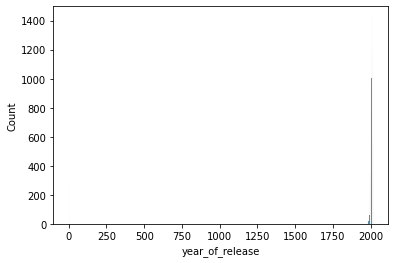

In [658]:
sns.histplot(data=df, x='year_of_release')

<AxesSubplot:xlabel='year_of_release', ylabel='count'>

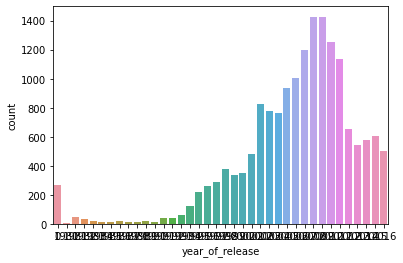

In [659]:
sns.countplot(df['year_of_release'])

Dari grafik diatas, kita bisa menyimpulkan bahwa data yang didapat sangat signifikan perubahannya, dimana pada tahun 1980-1985 jumlah game yang dirilis tidak ada yang melebihi 200 game, di periode tahun selanjutnya kita isa melihat bahwa jumlah game yang dirilis melebihi 200 game bahkan pada periode tahun 2000 ke atas melebihi 1400 game.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Variasi Penjualan Terhadap Platform

In [673]:
df = df[df['year_of_release'] != 0].reset_index(drop=True)

In [674]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_selling
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown,0.01


In [675]:
df_platform = df.groupby('platform').agg({'total_selling' : 'sum', 'name' : 'count', 'year_of_release' : ['min', 'max']}).sort_values(by=('year_of_release', 'min'), ascending=True).reset_index()
df_platform

platform total_selling  name year_of_release      
                      sum count             min   max
0      2600         86.48   116            1980  1989
1       NES        251.05    98            1983  1994
2        DS        802.78  2121            1985  2013
3        PC        255.76   957            1985  2016
4        GB        254.43    97            1988  2001
5      SNES        200.04   239            1990  1999
6       GEN         28.35    27            1990  1994
7        GG          0.04     1            1992  1992
8       SCD          1.86     6            1993  1994
9        NG          1.44    12            1993  1996
10      SAT         33.59   173            1994  1999
11       PS        727.58  1190            1994  2003
12      3DO          0.10     3            1994  1995
13     TG16          0.16     2            1995  1995
14     PCFX          0.03     1            1996  1996
15      N64        218.01   316            1996  2002
16       DC         15.95    52            1998  2008
17       WS          1.42     6            1999  2001
18      GBA        312.88   811            2000  2007
19       XB        251.57   803            2000  2008
20      PS2       1233.56  2127            2000  2011
21       GC        196.73   542            2001  2007
22      PSP        289.53  1193            2004  2015
23     X360        961.24  1232            2005  2016
24      PS3        931.34  1306            2006  2016
25      Wii        891.18  1286            2006  2016
26      3DS        257.81   512            2011  2016
27      PSV         53.81   429            2011  2016
28     WiiU         82.19   147            2012  2016
29      PS4        314.14   392            2013  2016
30     XOne        159.32   247            2013  2016

Hasil grouping berdasarkan platform, memperlihatkan bahwa platform 'PS2' memiliki nilai penjualan game terbesar dan jumlah game rilis terbanyak.

In [676]:
df_platform['platform_age'] = df_platform[('year_of_release', 'max')] - df_platform[('year_of_release', 'min')]
df_platform

platform total_selling  name year_of_release       platform_age
                      sum count             min   max             
0      2600         86.48   116            1980  1989            9
1       NES        251.05    98            1983  1994           11
2        DS        802.78  2121            1985  2013           28
3        PC        255.76   957            1985  2016           31
4        GB        254.43    97            1988  2001           13
5      SNES        200.04   239            1990  1999            9
6       GEN         28.35    27            1990  1994            4
7        GG          0.04     1            1992  1992            0
8       SCD          1.86     6            1993  1994            1
9        NG          1.44    12            1993  1996            3
10      SAT         33.59   173            1994  1999            5
11       PS        727.58  1190            1994  2003            9
12      3DO          0.10     3            1994  1995            1
13     TG16          0.16     2            1995  1995            0
14     PCFX          0.03     1            1996  1996            0
15      N64        218.01   316            1996  2002            6
16       DC         15.95    52            1998  2008           10
17       WS          1.42     6            1999  2001            2
18      GBA        312.88   811            2000  2007            7
19       XB        251.57   803            2000  2008            8
20      PS2       1233.56  2127            2000  2011           11
21       GC        196.73   542            2001  2007            6
22      PSP        289.53  1193            2004  2015           11
23     X360        961.24  1232            2005  2016           11
24      PS3        931.34  1306            2006  2016           10
25      Wii        891.18  1286            2006  2016           10
26      3DS        257.81   512            2011  2016            5
27      PSV         53.81   429            2011  2016            5
28     WiiU         82.19   147            2012  2016            4
29      PS4        314.14   392            2013  2016            3
30     XOne        159.32   247            2013  2016            3

In [677]:
df_platform['platform_age'].mean()

7.612903225806452

Rata-rata usia dari setiap platform adalah 7.6 tahun. Terdapat angka 0 yang menandakan platform tersebut berusia dibawah 1 tahun dan hanya merilis game di tahun yang sama. Untuk yang tertua berada pada usia 31 tahun. Dari tabel kita juga bisa melihat selisih kemunculan dari setiap platform berkisar 1-3 tahun saja dan platform lama rata-rata akan memudar setelah kurang lebih 7 tahun.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Melihat Platform Penjualan Tertinggi dan Terendah

Dari tabel sebelumnya kita mendapatkan bahwa platform 'PS2' adalah platform dengan jumlah game rilis dan penjualan tertinggi dibanding yang lainnya. Sedangkan untuk penjualan game terendah dan jumlah game terkecil ada pada platform 'PCFX'.

In [678]:
df_ps_2 = df[df['platform'] == 'PS2']

<AxesSubplot:xlabel='year_of_release', ylabel='Count'>

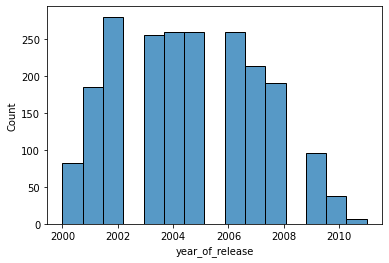

In [679]:
sns.histplot(df_ps_2['year_of_release'])

<AxesSubplot:xlabel='year_of_release', ylabel='total_selling'>

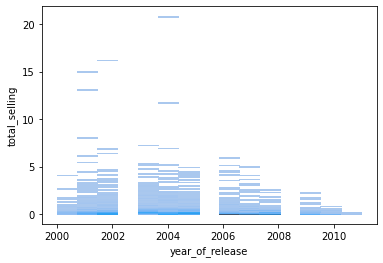

In [680]:
sns.histplot(df_ps_2, x='year_of_release', y='total_selling')

Dari kedua histogram terlihat bagaimana jumlah game yang dirilis dan dijual pada platform 'PS2'. Mereka menrilis game terbanyak pada tahun 2005 dan mendapatkan penjualan tertinggi pada 2004.

In [681]:
df_ps_pcfx = df[df['platform'] == 'PCFX']

<AxesSubplot:xlabel='year_of_release', ylabel='Density'>

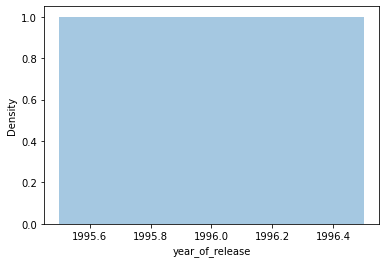

In [682]:
sns.distplot(df_ps_pcfx['year_of_release'])

<AxesSubplot:xlabel='total_selling', ylabel='Count'>

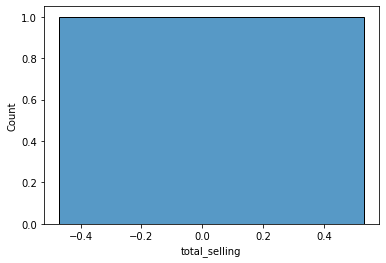

In [683]:
sns.histplot(df_ps_pcfx['total_selling'])

Platform 'PCFX' memiliki penjualan yang sangat sedikit, mengingat usia platform yang tidak mencapai 1 tahun dan hanya ada 1 permainan, 'PCFX' menjadi platform dengan total selling terkecil dari platform lainnya.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Periode Untuk Prediksi Tahun 2017

Periode waktu pengambilan data yang akan digunakan adalah data 4 tahun sebelum tahun 2017, jadi data yang kita ambil mulai dari tahun 2013, pemilihan periode ini dilakukan agar hasil yang didapat akurat, dikarenakan untuk menghindari platform yang sudah tidak lagi merilis game.

In [684]:
df_relevan = df[df['year_of_release'] > 2012].reset_index(drop=True)

In [685]:
df_relevan_platform = df_relevan.groupby(['platform'])['total_selling'].sum().sort_values(ascending=False)
df_relevan_platform

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_selling, dtype: float64

Dari hasil grouping platform terhadap total penjualan, platform 'PS4' memiliki penjualan tertinggi pada periode tahun 2013 keatas, yang menandakan bahwa platform 'PS4' adalah platform yang tumbuh dan berpotensi menghasilkan keuntungan. Sebaliknya, platform 'DS' tidak mengalami pertumbuhan dan cenderung akan cepat menyusut.

<AxesSubplot:xlabel='total_selling'>

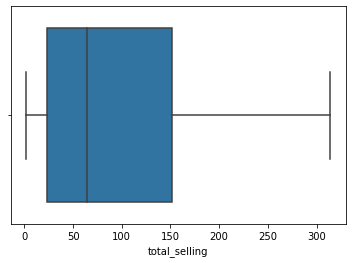

In [686]:
sns.boxplot(df_relevan_platform)

<AxesSubplot:xlabel='total_selling', ylabel='platform'>

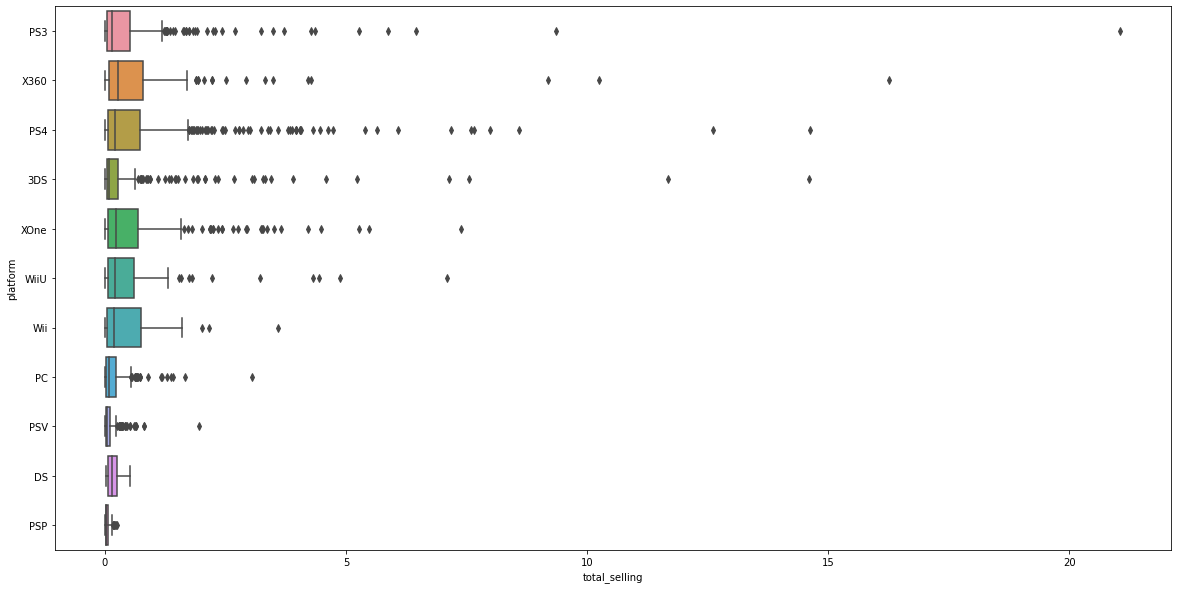

In [687]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df_relevan, x='total_selling', y='platform')

Dari boxplot masing-masing platform, terlihat hanya platform 'DS' saja yang tidak memiliki outlier, mungkin dikarenakan karena nilai penjualan yang kecil dan tidak ada perbedaan nilai penjualan yang sangat jauh satu sama lain. Untuk platform lain terlihat banyak sekali outlier pada boxplotnya, yang mana menandakan nilai penjualan pada setiap game dan tempat memiliki perbedaan nilai yang sangat jauh, sehingga banyak outlier yang terbentuk.

In [688]:
df_relevan.groupby(['platform'])['total_selling'].mean().sort_values(ascending=False)

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_selling, dtype: float64

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Korelasi Antara Total Selling Dengan User Score

#### Platform 'PS4'

In [689]:
df_relevan_ps4 = df_relevan[df_relevan['platform'] == 'PS4']

<AxesSubplot:xlabel='user_score', ylabel='total_selling'>

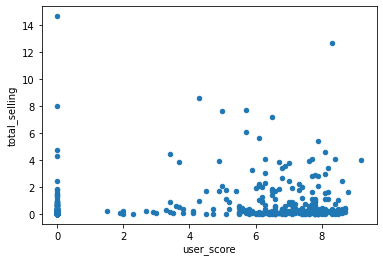

In [690]:
df_relevan_ps4.plot(x='user_score', y='total_selling', kind='scatter')

In [691]:
df_relevan_ps4['user_score'].corr(df_relevan_ps4['total_selling'])

0.11311562450852881

Perhitungan korelasi untuk user_score dengan 'total_selling' memiliki korelasi positif bernilai 0.11311562450852881, yang berarti keduanya memiliki korelasi yang sangat lemah dan searah.

#### Platform 'X360'

In [692]:
df_relevan_x360 = df_relevan[df_relevan['platform'] == 'X360']

<AxesSubplot:xlabel='user_score', ylabel='total_selling'>

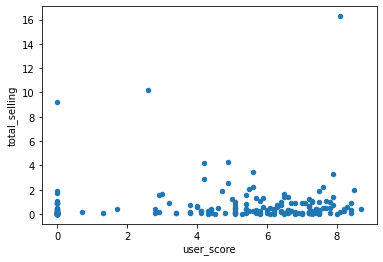

In [693]:
df_relevan_x360.plot(x='user_score', y='total_selling', kind='scatter')

In [694]:
df_relevan_x360['user_score'].corr(df_relevan_x360['total_selling'])

0.06881682823996771

Platform X360 juga memiliki korelasi yang sangat lemah dengan nilai korelasi 0.06881682823996771 dari penjualan dengan user score dan searah.

#### Platform 'PS3'

In [695]:
df_relevan_ps3 = df_relevan[df_relevan['platform'] == 'PS3']

<AxesSubplot:xlabel='user_score', ylabel='total_selling'>

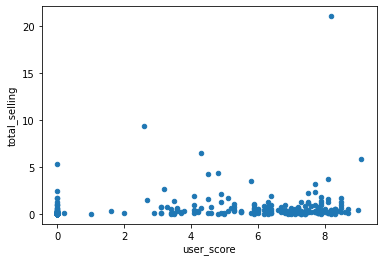

In [696]:
df_relevan_ps3.plot(x='user_score', y='total_selling', kind='scatter')

In [697]:
df_relevan_ps3['user_score'].corr(df_relevan_ps3['total_selling'])

0.20209116183305234

Platform PS3  memiliki korelasi yang sangat lemah yaitu sebesar 0.20209116183305234 dan searah.

#### Platform 'PSP'

In [698]:
df_relevan_psp = df_relevan[df_relevan['platform'] == 'PSP']

<AxesSubplot:xlabel='user_score', ylabel='total_selling'>

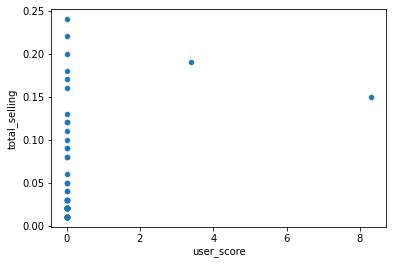

In [699]:
df_relevan_psp.plot(x='user_score', y='total_selling', kind='scatter')

In [700]:
df_relevan_psp['user_score'].corr(df_relevan_psp['total_selling'])

0.2976652756046914

Platform PSP memiliki korelasi yang cukup dari penjualan dengan user score yaitu sebesar 0.2976652756046914 dan searah.

In [702]:
df_relevan.groupby('genre').agg({'name': 'count', 'total_selling': 'sum'}).sort_values(by='name', ascending=False)

,name,total_selling
genre,,
Action,766,321.87
Role-Playing,292,145.89
Adventure,245,23.64
Sports,214,150.65
Shooter,187,232.98
Misc,155,62.82
Racing,85,39.89
Fighting,80,35.31
Platform,74,42.63


Dari hasil grouping genre terhadap jumlah game dan total penjualan, genre action adalah genre yg paling banyak dalam game yang dirilis dan memiliki total penjualan yang tertinggi dibandingkan dengan genre lainnya. Untuk itu, genre action adalah genre yang paling menguntungkan.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pemrofilan Masing-Masing Wilayah

### Platform Teratas

In [704]:
df_relevan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_selling
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01


#### Wilayah NA

In [705]:
df_relevan.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: na_sales, dtype: float64

Dari hasil grouping, 5 platform teratas secara berturut-turut di wilayah NA adalah PS4, XOne, X360, PS3, dan 3DS.

#### Wilayah EU

In [706]:
df_relevan.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: eu_sales, dtype: float64

Dari hasil grouping, 5 platform teratas secara berturut-turut di wilayah EU adalah PS4, PS3, XOne, X360, dan 3DS.

#### Wilayah JP

In [707]:
df_relevan.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: jp_sales, dtype: float64

Dari hasil grouping, 5 platform teratas secara berturut-turut di wilayah JP adalah 3DS, PS3, PSV, PS4, dan WiiU.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Genre Teratas

#### Wilayah NA

In [708]:
df_relevan.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: na_sales, dtype: float64

Pada wilayah NA, 5 genre teratas secara berurutan adalah action, shooter, sports, role-playing, dan misc.

#### Wilayah EU

In [709]:
df_relevan.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: eu_sales, dtype: float64

Pada wilayah EU, 5 genre teratas secara berurutan adalah action, shooter, sports, role-playing, dan racing.

#### Wilayah JP

In [710]:
df_relevan.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: jp_sales, dtype: float64

Pada wilayah JP, 5 genre teratas secara berurutan adalah role-playing, action, misc, fighting, dan shooter.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Pengaruh Rating ESRB di Seluruh Wilayah

#### Wilayah NA

In [711]:
df_relevan.groupby('rating')['na_sales'].sum()

rating
E           79.05
E10+        54.24
M          165.21
T           49.79
unknown     89.42
Name: na_sales, dtype: float64

Game dengan rating ESRB M adalah yang game yang paling banyak terjual di wilayah NA.

#### Wilayah EU

In [712]:
df_relevan.groupby('rating')['eu_sales'].sum()

rating
E           83.36
E10+        42.69
M          145.32
T           41.95
unknown     78.91
Name: eu_sales, dtype: float64

Sama dengan wilayah NA, game dengan rating ESRB M adalah yang game yang paling banyak terjual di wilayah EU.

#### Wilayah JP

In [713]:
df_relevan.groupby('rating')['jp_sales'].sum()

rating
E          15.14
E10+        5.89
M          14.11
T          20.59
unknown    85.05
Name: jp_sales, dtype: float64

Pada wilayah JP, game yang paling banyak terjual adalah game dengan rating ESRP unknown.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Uji Hipotesis

### Rata-Rata Rating Pengguna Platform Xbox One dan PC Adalah Sama

- H0 = Rata-rata rating pengguna platform 'Xbox' dan 'PC' SAMA
- H1 = Rata-rata rating pengguna platform 'Xbox' dan 'PC' TIDAK SAMA

Kedua hipotesis menggunakan alpha = 0.05, agar tingkat kepercayaan dari pengujian hipotesis sebesar 95% (100 *(1-alpha) %).

Hipotesis null yang kita berikan adalah kedua platform memiliki nilai rata-rata rating pengguna yang SAMA, sedangkan hipotesis alternatifnya adalah bentuk negasi dari hipotesis null dimana pendapatannya TIDAK SAMA.

In [728]:
df_xbox = df_relevan[df_relevan['platform'] == 'XOne']

In [729]:
df_xbox_1 = df_xbox[df_xbox['user_score'] != 0].reset_index(drop=True)

In [718]:
df_pc = df_relevan[df_relevan['platform'] == 'PC']

In [719]:
df_pc_1 = df_pc[df_pc['user_score'] != 0].reset_index(drop=True)

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- seharusnya ini pakai df_Relevan yg sudah difilter tahun
    - karena diatas nanti user_score tidak di fillna, maka disini bisa di take out nilai user_score yang null. karena kalau masih ada nilai yg null nilai p-value nya akan error.
    - ingat, di take out ya nilai null valuenya, bukan di fillna

</div>

In [720]:
df_xbox_1['user_score'].describe(), df_pc_1['user_score'].describe()

(count    182.000000
 mean       6.521429
 std        1.380941
 min        1.600000
 25%        5.800000
 50%        6.800000
 75%        7.500000
 max        9.200000
 Name: user_score, dtype: float64,
 count    155.000000
 mean       6.269677
 std        1.742381
 min        1.400000
 25%        5.300000
 50%        6.800000
 75%        7.600000
 max        9.300000
 Name: user_score, dtype: float64)

Dengan menggunakan metode describe kita mendapatkan bahwa rata-rata dari rating pengguna masing-masing platform berbeda walaupun perbedaannya tidak terlalu jauh. Dari metode ini kita bisa menyimpulkan bahwa rata-rata rating pengguna TIDAK SAMA.

In [721]:
np.var(df_xbox_1['user_score']), np.var(df_pc_1['user_score'])

(1.8965188383045526, 3.016306347554631)

In [724]:
(np.var(df_pc_1['user_score']) - np.var(df_xbox_1['user_score'])) / np.var(df_pc_1['user_score']) * 100

37.12446218063721

In [731]:
alpha = 0.05

results = st.ttest_ind(df_xbox_1['user_score'], df_pc_1['user_score'], equal_var = True)

print('p-value= ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita menerima hipotesis nol')

p-value=  0.14012658403611647
Kita menerima hipotesis nol


Dengan menggunakan T-test independent (Levene's Method), didapatkan p-value sebesar 0.14012658403611647, dengan kata lain p-value > alpha. Mengacu dengan hasil itu kita menerima Hipotesis Null dimana rata-rata rating pengguna platform adalah sama.

Dengan melihat hasil diatas, penggunaan T-test independent memiliki hasil yang lebih akurat, karena pada prosesnya akan melihat varians dari kedua data yang dibandingkan, serta tes ini mengasumsikan bahwa populasi memiliki varian identik secara default.

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Rata-Rata Rating Pengguna Genre Action dan Sport Tidak Sama

- H0 = Rata-rata rating pengguna genre action dan sport SAMA
- H1 = Rata-rata rating pengguna genre action dan sport TIDAK SAMA

In [732]:
df_action = df_relevan[df['genre'] == 'Action']

In [733]:
df_action_1 = df_action[df_action['user_score'] != 0]

In [734]:
df_sport = df_relevan[df_relevan['genre'] == 'Sports']

In [735]:
df_sport_1 = df_sport[df_sport['user_score'] != 0]

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- seharusnya ini pakai df_Relevan yg sudah difilter tahun
    - karena diatas nanti user_score tidak di fillna, maka disini bisa di take out nilai user_score yang null. karena kalau masih ada nilai yg null nilai p-value nya akan error.
    - ingat, di take out ya nilai null valuenya, bukan di fillna

</div>

In [736]:
df_action_1['user_score'].describe(), df_sport_1['user_score'].describe()

(count    254.000000
 mean       6.488976
 std        1.693546
 min        0.200000
 25%        5.625000
 50%        6.900000
 75%        7.700000
 max        9.300000
 Name: user_score, dtype: float64,
 count    160.000000
 mean       5.238125
 std        1.783427
 min        0.200000
 25%        4.100000
 50%        5.500000
 75%        6.500000
 max        8.800000
 Name: user_score, dtype: float64)

In [737]:
np.var(df_action_1['user_score']), np.var(df_sport_1['user_score'])

(2.856807613615227, 3.160733984375)

In [738]:
(np.var(df_sport_1['user_score']) - np.var(df_action_1['user_score'])) / np.var(df_action_1['user_score']) * 100

10.63867126758183

In [739]:
alpha = 0.05

results = st.ttest_ind(df_sport_1['user_score'], df_action_1['user_score'], equal_var = True)

print('p-value= ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita menerima hipotesis nol')

p-value=  3.5274946303960083e-12
Kita menolak hipotesis nol


Dengan menggunakan T-test independent (Levene's Method), didapatkan p-value sebesar 3.5274946303960083e-12, dengan kata lain p-value < alpha. Mengacu dengan hasil itu kita menolak Hipotesis Null dimana rata-rata rating pengguna genre action dan sport adalah sama.

Dengan melihat hasil diatas, penggunaan T-test independent memiliki hasil yang lebih akurat, karena pada prosesnya akan melihat varians dari kedua data yang dibandingkan, serta tes ini mengasumsikan bahwa populasi memiliki varian identik secara default.

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Kesimpulan

Dari hasil pengolahan dan analisis dari datasets game, didapatkan beberapa kesimpulan seperti:
- Game yang dirilis pada rentang tahun 2006-2011 melebihi 1000 game setiap tahunnya.
- Pada rentang yang sama, platform 'PS2' menjadi platform yang terbaik dari sisi penjualan serta game yang diriis.
- Sebagai acuan untuk prediksi pada tahun 2017, dipilih rentang tahu 2013-2016 untuk analisis. Pada rentang tahun itu, platform 'PS4' menjadi platform yang terbaik dari sisi penjualan juga perilisan game, dimana ini akan membuat platform'PS4' juga akan semakin tumbuh dan berpotensi menghasilkan keuntungan.
- Pada keadaan sebaliknya, platform 'DS' menjadi platform terkecil dari sisi penjualan serta perilisan game, dimana ini menandakan platform 'DS' tidak akan tumbuh pada tahun yang akan datang.
- Untuk wilayah NA dan Eu platform teratas adalah 'PS4' sedangkan untuk wilayah JP adalah '3DS'.
- Genre teratas untuk wilayah NA dan EU adalah action, sedangkan untuk JP adalah 'Role-Playing'.
- Rata-rata rating pengguna XboxOne dan PC sama karena nilai p-value < alpha, dimana nilai p-valuenya 0.14012658403611647 jauh dibawah alpha yang ditentukan yaitu 0.05.
- Rata-rata rating pengguna genre action dan sport tidak sama, didapat dari nilai p-value < alpha yaitu sebesar 3.5274946303960083e-12.

<div class="alert alert-block alert-warning">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Putu! Sebagian besar kamu telah menyelesaikan project ini dengan baik namun masih ada beberapa hal yang bisa diimprove yang saya tandai dengan comment berwarna kuning dan merah. Jika kamu telah merevisinya, projectmu akan di approve dan kamu bisa lanjut ke tahapan selanjutnya!.
    
Keep going Putu, you are doing very well!
    

</div>

<div class="alert alert-block alert-success">

# General comments #2
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Putu! Revisi sudah sesuai yah!
    

</div>